## Multi-layer perceptron

**AIM**: Build a multi-layer perceptron from scratch

1. 30 hidden layer neurons
2. use a ReLU function as activation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
from torch.nn import functional as F
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(42)

In [5]:
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

X_train, X_val, y_train, y_val = train_test_split(images,target, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1437, 8, 8) (1437,)
(360, 8, 8) (360,)


In [8]:
# preprocessing data
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1,64) 
y_train = F.one_hot(torch.tensor(y_train), num_classes=10)

X_val = torch.tensor(X_val, dtype=torch.float32).reshape(-1,64) 
y_val = F.one_hot(torch.tensor(y_val), num_classes=10)

#normalization 
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std

#### Multi-layer perceptron
**First Layer**: <br>
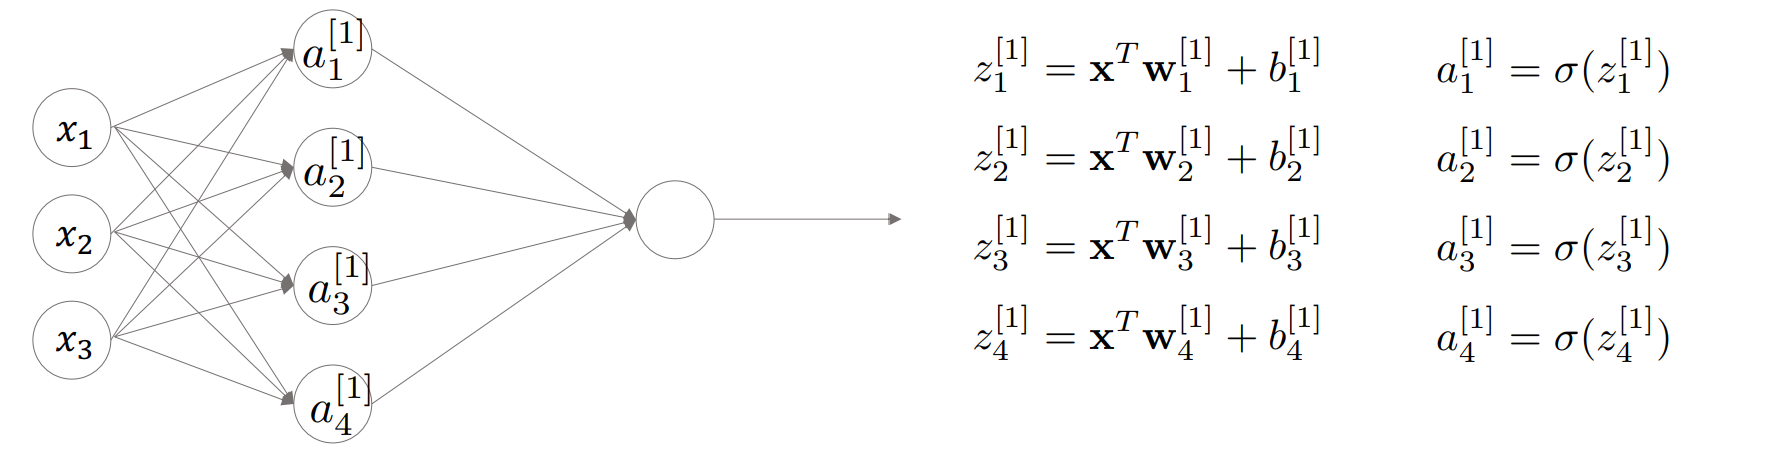
<br>
&emsp;&emsp;&emsp;$\Large Z^{[1]} = XW^{[1]T}+B^{[1]}$ <br>
&emsp;&emsp;&emsp;&emsp;&emsp;$\Large =\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\ 
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3} \\
x_{4,1} & x_{4,2} & x_{4,3} \\
x_{5,1} & x_{5,2} & x_{5,3} \\
\end{bmatrix}
\begin{bmatrix}
w^{[1]}_{1,1} & w^{[1]}_{2,1} & w^{[1]}_{3,1} & w^{[1]}_{4,1}\\
w^{[1]}_{1,2} & w^{[1]}_{2,2} & w^{[1]}_{3,2} & w^{[1]}_{4,2}\\
w^{[1]}_{1,3} & w^{[1]}_{2,3} & w^{[1]}_{3,3} & w^{[1]}_{4,3}\\
\end{bmatrix}
+ \begin{bmatrix}
b^{[1]}_{1,1} & b^{[1]}_{1,2} & b^{[1]}_{1,3} & b^{[1]}_{1,4} \\
\end{bmatrix}
= \begin{bmatrix}
z^{[1]}_{1,1} & z^{[1]}_{1,2} & z^{[1]}_{1,3} & z^{[1]}_{1,4}\\
z^{[1]}_{2,1} & z^{[1]}_{2,2} & z^{[1]}_{2,3} & z^{[1]}_{2,4}\\
z^{[1]}_{3,1} & z^{[1]}_{3,2} & z^{[1]}_{3,3} & z^{[1]}_{3,4}\\
z^{[1]}_{4,1} & z^{[1]}_{4,2} & z^{[1]}_{4,3} & z^{[1]}_{4,4}\\
z^{[1]}_{5,1} & z^{[1]}_{5,2} & z^{[1]}_{5,3} & z^{[1]}_{5,4}\\
\end{bmatrix}
$
<br>
**Second Layer**: <br>
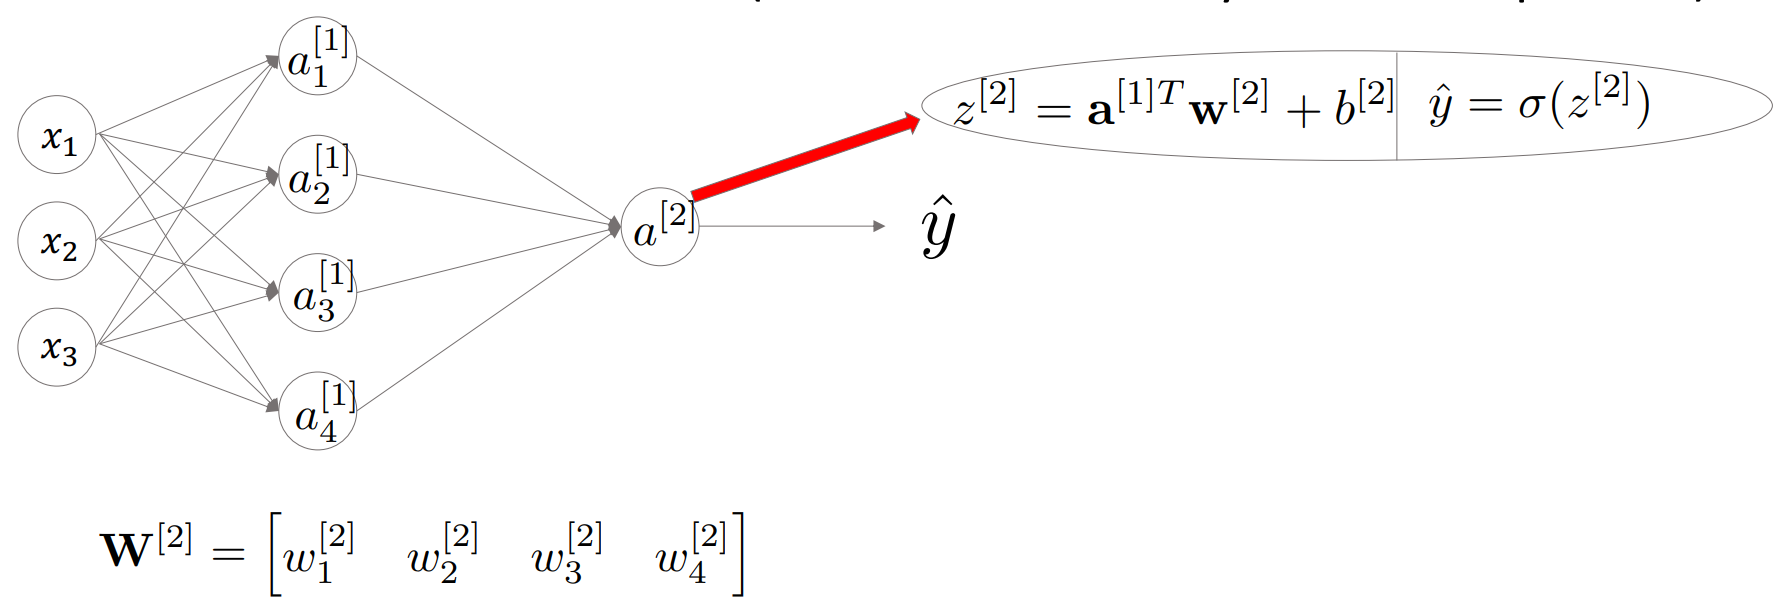
<br>
&emsp;&emsp;&emsp;$\Large Z^{[2]} = A^{[2]}W^{[2]T}+B^{[2]}$ <br>
&emsp;&emsp;&emsp;&emsp;&emsp;$\Large =\begin{bmatrix}
a^{[1]}_{1,1} & a^{[1]}_{1,2} & a^{[1]}_{1,3} & a^{[1]}_{1,4}\\
a^{[1]}_{2,1} & a^{[1]}_{2,2} & a^{[1]}_{2,3} & a^{[1]}_{2,4}\\
a^{[1]}_{3,1} & a^{[1]}_{3,2} & a^{[1]}_{3,3} & a^{[1]}_{3,4}\\
a^{[1]}_{4,1} & a^{[1]}_{4,2} & a^{[1]}_{4,3} & a^{[1]}_{4,4}\\
a^{[1]}_{5,1} & a^{[1]}_{5,2} & a^{[1]}_{5,3} & a^{[1]}_{5,4}\\
\end{bmatrix}
\begin{bmatrix}
w^{[2]}_{1} \\ w^{[2]}_{2} \\ w^{[2]}_{3} \\ w^{[2]}_{4} \\
\end{bmatrix}
+ \begin{bmatrix}
b^{[2]}_{1} \\ b^{[2]}_{2} \\ b^{[2]}_{3} \\ b^{[2]}_{4} \\
\end{bmatrix}
$

<br>

In [9]:
X_train.shape

torch.Size([1437, 64])

In [34]:
m, n = X_train.shape

nh= 30 # number of hidden layer neurons
class_num = 10
w1 = torch.randn((nh, n), requires_grad=True) # output x input
b1 = torch.zeros((1,nh), requires_grad=True) # 1 x nh

w2 = torch.rand((class_num, nh), requires_grad=True)
b2 = torch.zeros((1,class_num), requires_grad=True)

In [35]:
def linear(X, W, b):
    return X@W.T + b

def relu(Z):
    '''
    Activation function: ReLu funtion
    '''
    return Z.clamp_min(0.)

def softmax(X):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True)[0])
    return e_x / torch.sum(e_x, dim=-1,keepdim=True) + 1e-10

def model(X):
    z1 = linear(X,w1,b1)
    A1 = relu(Z1)
    z2 = linear(A1, w2, b2)
    A2 = softmax(z2)
    return A2

In [36]:
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True)[0])
    return e_x / torch.sum(e_x, dim=-1,keepdim=True) + 1e-10

# cross entropy function
def cross_entropy(y_true, y_pred):
    return -torch.sum(y_true * torch.log(y_pred+ 1e-10)) / y_true.shape[0]
    

In [37]:
epochs = 30
batch_size = 30
num_batches = np.ceil(len(y_train)/batch_size).astype(int)
loss_log = []
learning_rate = 0.03

# logs
train_losses = []
val_losses = []
val_accuracies = []

# initiallize parameters
W = torch.rand((10, 64), requires_grad=True)
b = torch.rand((1, 10), requires_grad=True)

for epoch in range(epochs):
    
    shuffled_indices = np.random.permutation(len(y_train))
    running_loss = 0
    
    for i in range(num_batches):

        start = i * batch_size
        end = start + batch_size
        batch_indices = shuffled_indices[start:end]

        # place break point
        # import pdb; pdb.set_trace()
        
        y_true_ = y_train[batch_indices,:] # data_num x class_num.
        X = X_train[batch_indices,:] # data_num x feature_num

        Z = X @ W.T + b

        # calculate y_pred with softmax function
        y_pred = softmax(Z)

        # calcualte loss with cross entropy function
        loss = cross_entropy(y_true_, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # calculate gradient
        loss.backward()

        # update parameter
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad

        # initialize gradient
        W.grad.zero_()
        b.grad.zero_()

    # validation
    with torch.no_grad():
        Z_val = X_val@W.T + b
        y_pred_val = softmax(Z_val)

        val_loss = cross_entropy(y_val, y_pred_val)
        val_accuracy = (torch.sum(torch.argmax(y_pred_val, dim=-1) == torch.argmax(y_val, dim=-1)) / y_val.shape[0])

    train_losses.append(running_loss/num_batches)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy.item())

    #print log
    print(f'epoch: {epoch+1}: train loss :{running_loss/num_batches:.4f} val loss: {val_loss:.4f} val accuracy {val_accuracy:.4f}')

epoch: 1: train loss :3.1338 val loss: 2.0080 val accuracy 0.2778
epoch: 2: train loss :1.4419 val loss: 1.1082 val accuracy 0.6472
epoch: 3: train loss :0.9029 val loss: 0.7580 val accuracy 0.7806
epoch: 4: train loss :0.6701 val loss: 0.5879 val accuracy 0.8500
epoch: 5: train loss :0.5446 val loss: 0.4890 val accuracy 0.8861
epoch: 6: train loss :0.4665 val loss: 0.4241 val accuracy 0.8972
epoch: 7: train loss :0.4131 val loss: 0.3757 val accuracy 0.9083
epoch: 8: train loss :0.3733 val loss: 0.3440 val accuracy 0.9167
epoch: 9: train loss :0.3438 val loss: 0.3174 val accuracy 0.9167
epoch: 10: train loss :0.3202 val loss: 0.2948 val accuracy 0.9278
epoch: 11: train loss :0.2999 val loss: 0.2780 val accuracy 0.9333
epoch: 12: train loss :0.2831 val loss: 0.2625 val accuracy 0.9306
epoch: 13: train loss :0.2694 val loss: 0.2505 val accuracy 0.9361
epoch: 14: train loss :0.2572 val loss: 0.2402 val accuracy 0.9361
epoch: 15: train loss :0.2465 val loss: 0.2311 val accuracy 0.9361
epoc

In [38]:
y_train_pred = model(X_train)
y_train_pred.shape

torch.Size([1437, 10])